In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [9]:
# Load Labeled Faces in the Wild dataset
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5)
X, y = lfw_people.data, lfw_people.target


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [11]:
# Apply PCA for dimensionality reduction
n_components = 200
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
# Define SVM classifier with Grid Search
param_grid = {'C': [1, 10, 100],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf', 'poly']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_pca[:, :2], y_train)

# Get the best model
best_svm = grid_search.best_estimator_


In [27]:
# Define SVM classifier with Grid Search
param_grid = {'C': [1, 10, 100],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf', 'poly']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Get the best model
best_svm2 = grid_search.best_estimator_


In [30]:
X_train_pca.shape

(1170, 200)

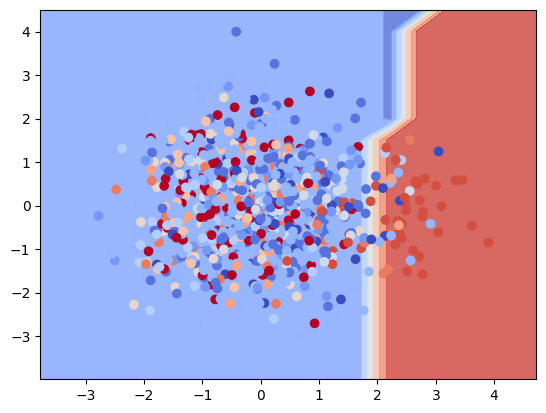

In [25]:
def plot_decision_boundary(model, X, y):
    h = .5  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

# Train a separate SVM model on the first two principal components
svm_2d = GridSearchCV(SVC(), param_grid, cv=5)
svm_2d.fit(X_train_pca[:, :2], y_train)

# Use the new model to plot the decision boundary
plot_decision_boundary(best_svm, X_train_pca[:, :2], y_train)

In [ ]:
# Print support vectors and margin size
support_vectors = best_svm.support_vectors_
margin_size = 2 / np.linalg.norm(best_svm.coef_)
print(f"Number of support vectors: {len(support_vectors)}")
print(f"Margin size: {margin_size:.4f}")


In [ ]:
best_svm.score(X_test_pca, y_test)

0.8025641025641026